In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [4]:
# Load the data
oecd_bli = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [18]:
print(gdp_per_capita.columns.tolist())


['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'GDP per capita', 'Estimates Start After']


In [19]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    Possible implementation of the 'prepare_country_stats' function,
    based on the actual structure of the original datasets.
    """
    # Filter only life satisfaction and total inequality
    oecd_bli = oecd_bli[(oecd_bli["Indicator"] == "Life satisfaction") &
                        (oecd_bli["INEQUALITY"] == "TOT")]

    # Pivot to get 'Life satisfaction' per country
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    # Merge by index (country name)
    full_country_stats = pd.merge(oecd_bli, gdp_per_capita, left_index=True, right_index=True)

    return full_country_stats


In [20]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

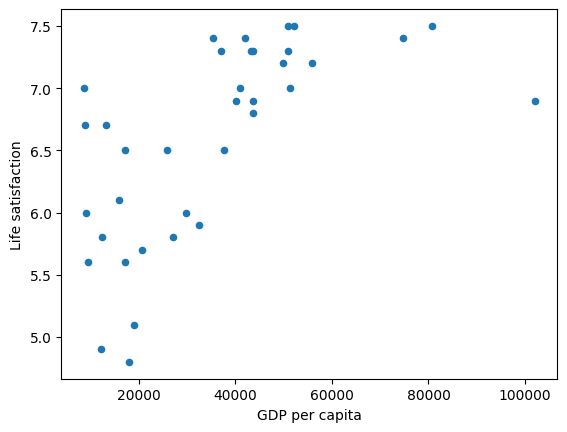

In [21]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [22]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [23]:
# Train the model
lin_reg_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # Author outputs [[ 5.96242338]

[[6.28653637]]


In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
# Select a k-NN regression model with k=3
knn_model = KNeighborsRegressor(n_neighbors=3)

In [27]:
# Train the model
knn_model.fit(X, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
# Predict life satisfaction for Cyprus
X_new = [[22587]]  # GDP per capita of Cyprus
print(knn_model.predict(X_new))  # Expected output: close to 5.77

[[5.76666667]]
